## Cell 1: Import all required libraries

In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller


## Cell 2: Load your price data

In [22]:
prices = pd.read_csv("data/prices.csv", index_col=0, parse_dates=True)


## Cell 3: Select your two stocks

In [23]:
A = prices["DABUR.NS"]
B = prices["HINDUNILVR.NS"]


## Cell 4: Run Regression to Find the Hedge Ratio (β)

In [25]:
import statsmodels.api as sm

model = sm.OLS(A, sm.add_constant(B)).fit()
beta = model.params[1]
alpha = model.params[0]

print("Hedge Ratio (beta):", beta)
print("Intercept (alpha):", alpha)


Hedge Ratio (beta): 0.1801205130973733
Intercept (alpha): 112.52235351366012


C:\Users\arora\AppData\Local\Temp\ipykernel_12940\3658694800.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = model.params[1]
C:\Users\arora\AppData\Local\Temp\ipykernel_12940\3658694800.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  alpha = model.params[0]


## Cell 5: Create the Spread

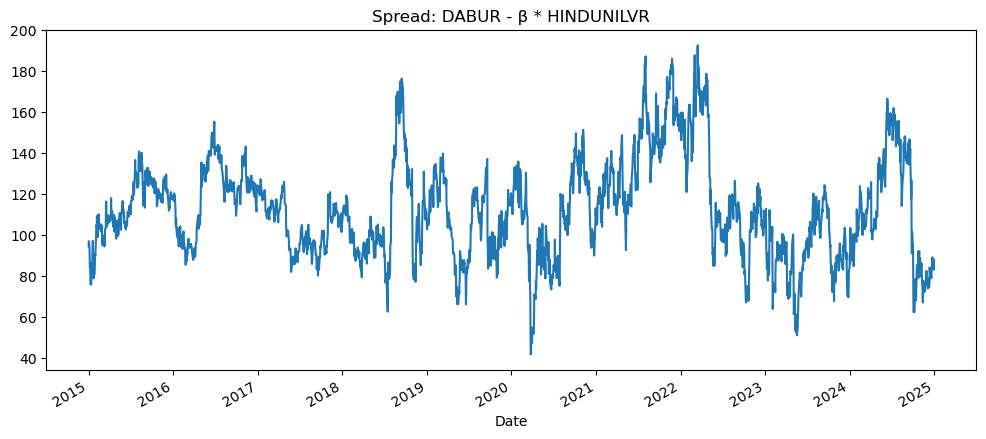

In [26]:
spread = A - beta * B
spread.plot(figsize=(12,5), title="Spread: DABUR - β * HINDUNILVR")
plt.show()


## Cell 6: ADF test for Stationarity 

In [27]:
adf_result = adfuller(spread.dropna())
print("ADF Statistic:", adf_result[0])
print("p-value:", adf_result[1])


ADF Statistic: -5.115530275179751
p-value: 1.3045212670932151e-05


## Cell 7: Compute Z-Score (Standardized Spread)

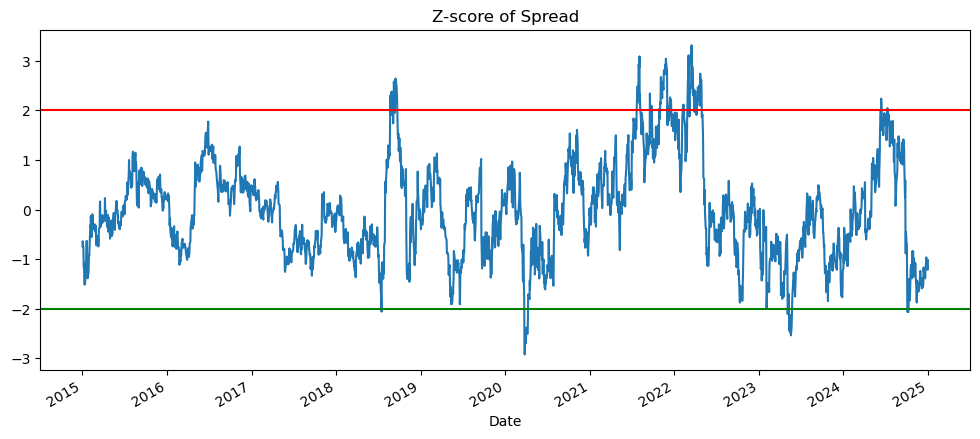

In [28]:
spread_mean = spread.mean()
spread_std = spread.std()

zscore = (spread - spread_mean) / spread_std

zscore.plot(figsize=(12,5), title="Z-score of Spread")
plt.axhline(2, color='red')
plt.axhline(-2, color='green')
plt.show()


## Cell 8: Save Spread & Z-score for Next Steps

In [29]:
spread.to_csv("data/spread_dabur_hul.csv")
zscore.to_csv("data/zscore_dabur_hul.csv")
